In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1)
X = mnist["data"]

newArray=np.array([])
i=0
while i<2000:
    newArray = np.append (newArray, X[i],axis=0)
    i+=1
    
X=np.reshape(newArray,(2000,784))
print(X)
print(np.size(X,0))
print(np.size(X,1))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
2000
784


complete
complete
Set of terminal loss-function values for all intializations
[1984.088856606601, 1993.5412208990526]
Sequence of Values over kmeans for best soultion
[2037.8209894350346, 2038.6900224672831, 989.7769887242798, 928.6316180194469, 989.9820609184387, 1015.8062434795913, 1013.0591021974134, 1002.770429470095, 1007.3472354598365, 1008.9957208525472, 1010.9680710545656, 1005.5011673218353, 999.0337499935158, 1012.4085237005523, 1007.6890624950319, 997.9450834447844, 994.0169182298009, 1006.1622521549714, 1000.3498803380343, 994.8625072176277, 995.5064178126771, 997.6535433888623, 995.9969707335246, 997.1227727851234, 996.7706104495263, 996.7706104495263, 996.7706104495263, 996.7706104495263]
Cluster info for best Solution
[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00

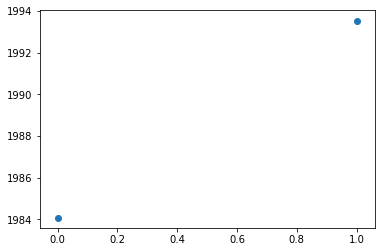

Best K means sequence for loss function


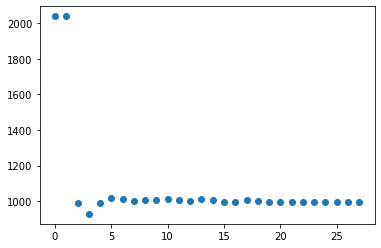

In [84]:
import random
from numpy import linalg as LA
import math
import matplotlib.pyplot as plt


def kmeans(X,k,n):
    loss_function=[]
    loss_function_total=[]
    compare_matrix=[]
    cluster_matrix=[]
    for i in range(n):
        try:
            random_array=random.sample(range(0 , 2000), k)
        except ValueError:
            print('Too many centers for given sample')
        #print(random_array)
        center_array=[]
        for x in random_array:
            center_array.append(X[x])
        #print(center_array)
        #center_array1=np.mean(center_array,axis=0)
        #print(center_array1)
        distance_matrix=[]
        loss_functiondata=[]
        while (1):
            tempArray=[]
            tempdis=[]
            for element in X:
                for center_element in center_array:
                    distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(element, center_element)]))
                    tempdis.append(distance)
                index1=tempdis.index(max(tempdis))
                tempArray.append(index1)
                tempdis.clear()

            NewarrayCenter=[]
            arrayCenterTemp=[]
            for k_value in range(k):
                i=0
                for x in tempArray:
                    if x==k_value:
                        arrayCenterTemp.append(X[i])
                    i+=1
                newcenter=np.mean(np.array(arrayCenterTemp),axis=0)
                #print(newcenter)
                #print (arrayCenterTemp)
                NewarrayCenter.append(newcenter)
                arrayCenterTemp.clear()
            old_dist_matrix=distance_matrix.copy()
            distance_matrix=[]
            
            i=0
            for i in range(k):
                distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(center_array[i], NewarrayCenter[i])]))
                distance_matrix.append(distance)
                loss_functiondata.append(distance)
            center_array=NewarrayCenter.copy()
            if old_dist_matrix==distance_matrix:
                print("complete")
                value=0
                for x in distance_matrix:
                    value=value+x
                compare_matrix.append(value)
                cluster_matrix.append(center_array)
                break
        loss_function.append(distance_matrix)
        loss_function_total.append(loss_functiondata)
    print("Set of terminal loss-function values for all intializations")
    print(compare_matrix)
    index1=compare_matrix.index(max(compare_matrix))
    print("Sequence of Values over kmeans for best soultion")
    print(loss_function_total[index1])
    print("Cluster info for best Solution")
    print(cluster_matrix[index1])
    
    
    print("N terminal loss fucntion values plot")
    x=[]
    i=0
    for i in range(n):
        x.append(i)
    y=compare_matrix
    plt.scatter(x,y)
    plt.show()
    
    print("Best K means sequence for loss function")
    x=[]
    i=0
    for a in loss_function_total[index1]:
        x.append(i)
        i+=1
    y=loss_function_total[index1]
    plt.scatter(x,y)
    plt.show()
    
kmeans(X,2,2)


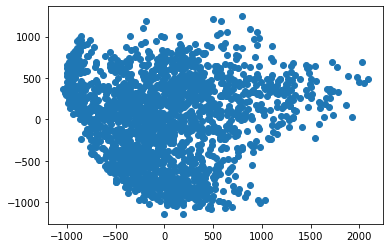

c:\users\sharan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


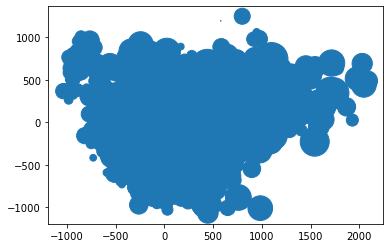

PCA 2d Variance: [0.10009538 0.07460617]
PCA 3d Variance: [0.10009538 0.07460617 0.06463688]


In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
#Part 2

#2D
pca2d = PCA(n_components = 2)
X2D = pca2d.fit_transform(X)

#plottable_image = np.reshape(X2D,(28, 28))

x, y = X2D.T
plt.scatter(x,y)
plt.show()


#3D
pca3d = PCA(n_components = 3)
X3D = pca3d.fit_transform(X)

#plottable_image = np.reshape(X2D,(28, 28))

x, y, z = X3D.T
plt.scatter(x,y,z)
plt.show()


#Part B

#This shows the arrays from the explained variance ratio
print("PCA 2d Variance:",pca2d.explained_variance_ratio_)
print("PCA 3d Variance:", pca3d.explained_variance_ratio_)